# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIT projects/Project Potential Customers Prediction/ExtraaLearn.csv')

In [ ]:
df.shape

(4612, 15)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
df.head()
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [ ]:
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


In [ ]:
# Printing the % sub categories of each category
for i in df.describe(include=["object"]).columns: # Loop through columns containing string values
    print("Unique values in", i, "are :") # Print the column name
    print(df[i].value_counts()) # Print the count of each unique value in the column
    print("*" * 50) # Print a separator for better readability

Unique values in ID are :
ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
**************************************************
Unique values in current_occupation are :
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
**************************************************
Unique values in first_interaction are :
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
**************************************************
Unique values in profile_completed are :
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
**************************************************
Unique values in last_activity are :
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
*****************************

## Observations

### 1. Data Structure and Overview
- **Shape of Data**: The dataset has 4612 rows x 15 columns.  
- **Duplicate Records**: 0 duplicate rows found in the dataset. So we could remove the unique ID column if desired.
- **Data Types**: The dataset contains a mix of numerical and categorical variables. Below is a breakdown:
  - Numerical variables (int64 and float64): Age, website visits, time spent on website, page views per visit, and status.
  - Categorical variablesv (object): ID, current occupation, first interaction, profile completed, last activity, print media type 1, print media type 2, digital media, educational channels, and referal.

### 2. Data Quality Checks
- **Missing Values**: No columns have missing or null values.

- **Categorical Data**:
  - **Unique Values**: Each categorical column has the following unique values:
    - `current_occupation`: Professional, Unemployed, Student.
    - `first_interaction`: Website, Mobile App.
    - `profile_completed`: Low, Medium, High.
    - `last_activity`: Website Activity, Email Activity, Phone Activity.
    - `print_media_type1`: Yes, No.
    - `print_media_type2`: No, Yes.
    - `digital_media`: Yes, No.
    - `educational_channels`: No, Yes.
    - `referral`: No, Yes.

- **Numerical Data**:
  - **Summary Statistics**:
    - `age`: Mean = 46.20, Std Dev = 13.16, Min = 18, Max = 63.
    - `website_visits`: Mean = 3.57, Std Dev = 2.83, Min = 0, Max = 30.
    - `time_spent_on_website`: Mean = 724.01, Std Dev = 743.83, Min = 0, Max = 2537.
    - `page_views_per_visit`: Mean = 3.03, Std Dev = 1.97, Min = 0, Max = 18.43.
    - `status`: Binary indicator (Mean = 0.30, indicating ~30% paying users.).

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Feature Engineering**
- Categorical variables were **one-hot encoded** for modeling.

In [ ]:
#Prepare data for modeling
data=df.copy()
data.drop(["ID"], axis=1, inplace=True)
data.sample(5)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
3921,60,Professional,Website,High,2,1637,1.54300,Phone Activity,Yes,No,No,No,No,1
1885,57,Professional,Mobile App,Low,2,260,2.25600,Website Activity,No,No,Yes,No,No,0
4343,32,Professional,Mobile App,High,4,2008,3.37600,Email Activity,No,No,No,No,No,0
3290,56,Unemployed,Website,High,2,282,2.09600,Email Activity,No,No,No,No,No,1
495,56,Professional,Website,High,2,577,0.19300,Email Activity,Yes,No,No,No,No,1


## EDA

- It is a good idea to explore the data once again after manipulating it.

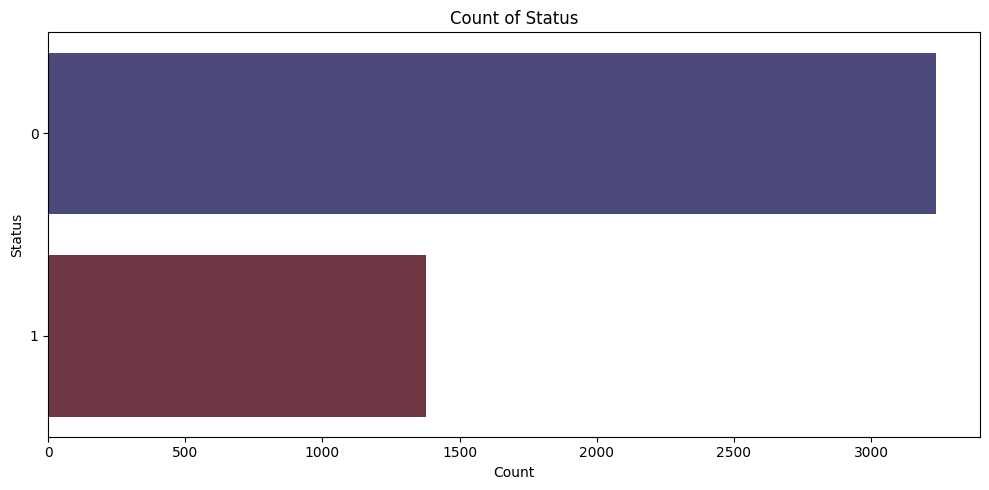

In [ ]:
# Countplot for the 'status' column
plt.figure(figsize=(10, 5))
sns.countplot(y=data['status'], order=data['status'].value_counts().index, palette="icefire")
plt.title('Count of Status')
plt.xlabel('Count')
plt.ylabel('Status')
plt.tight_layout()
plt.show()

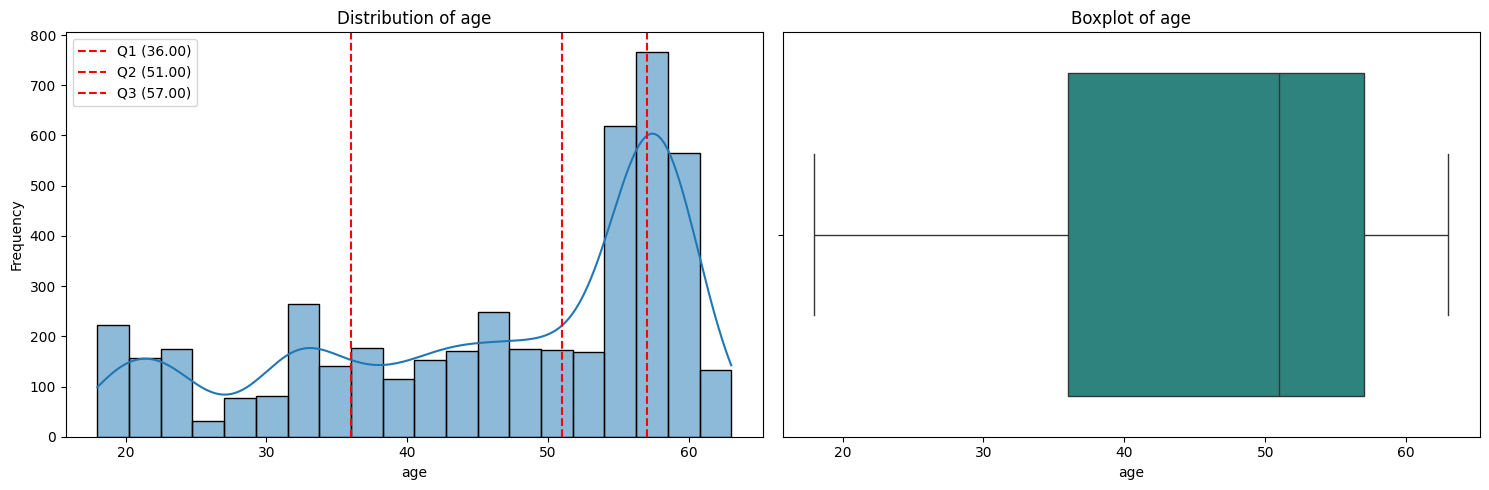

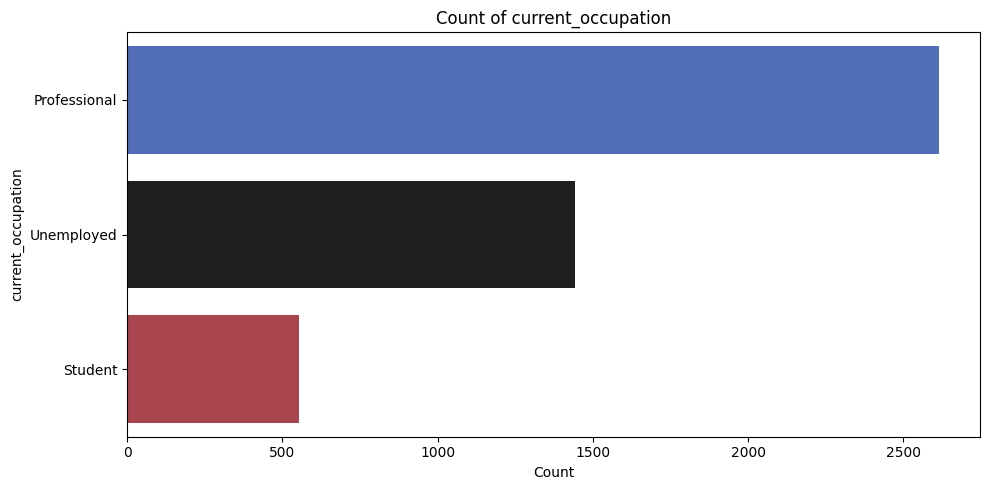

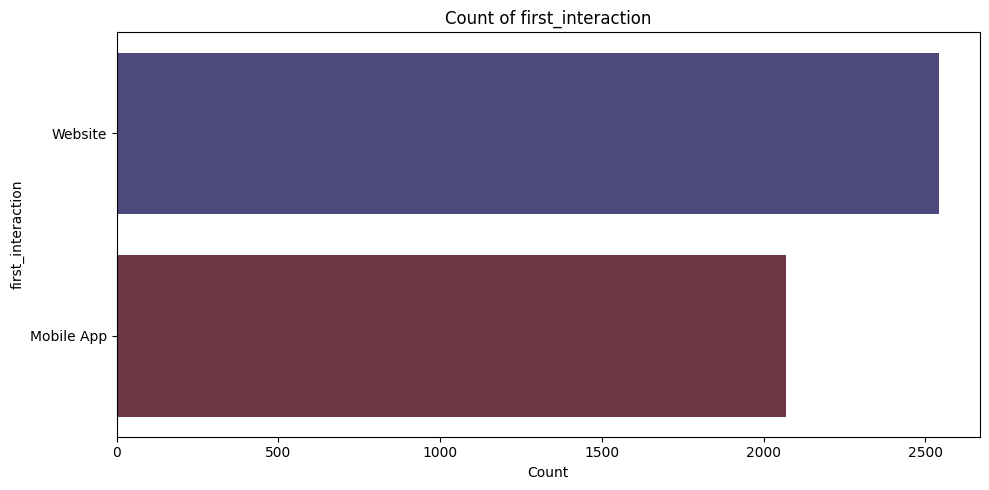

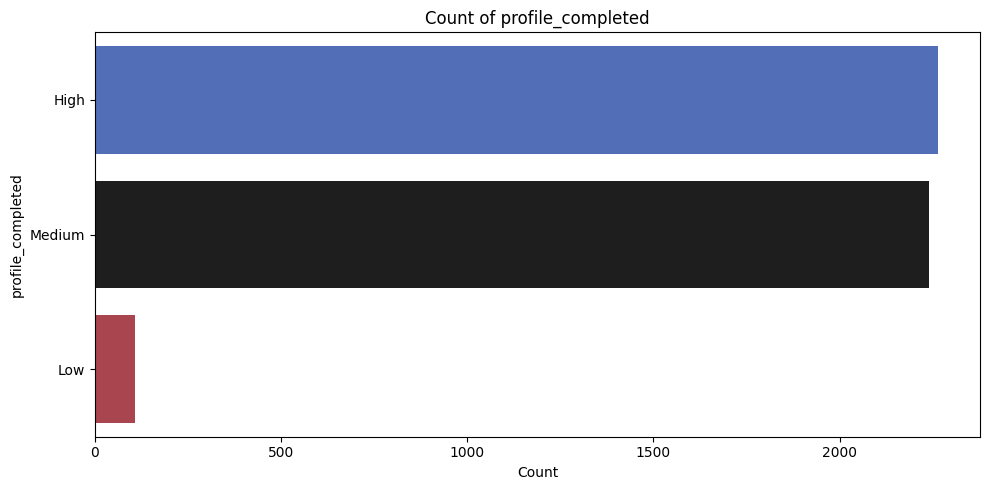

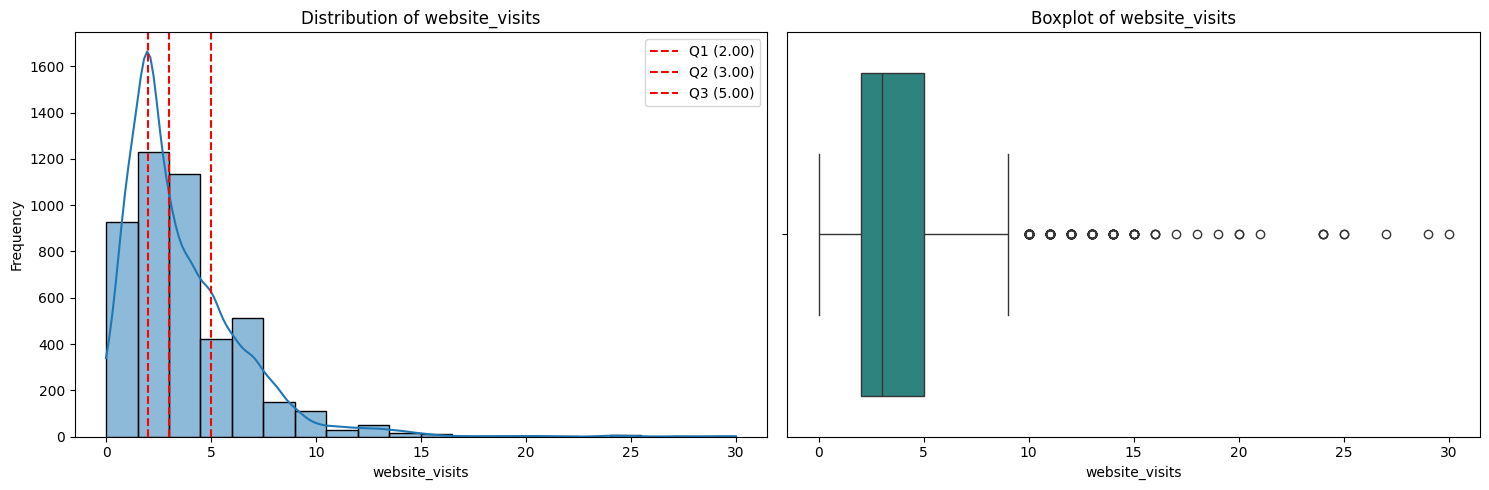

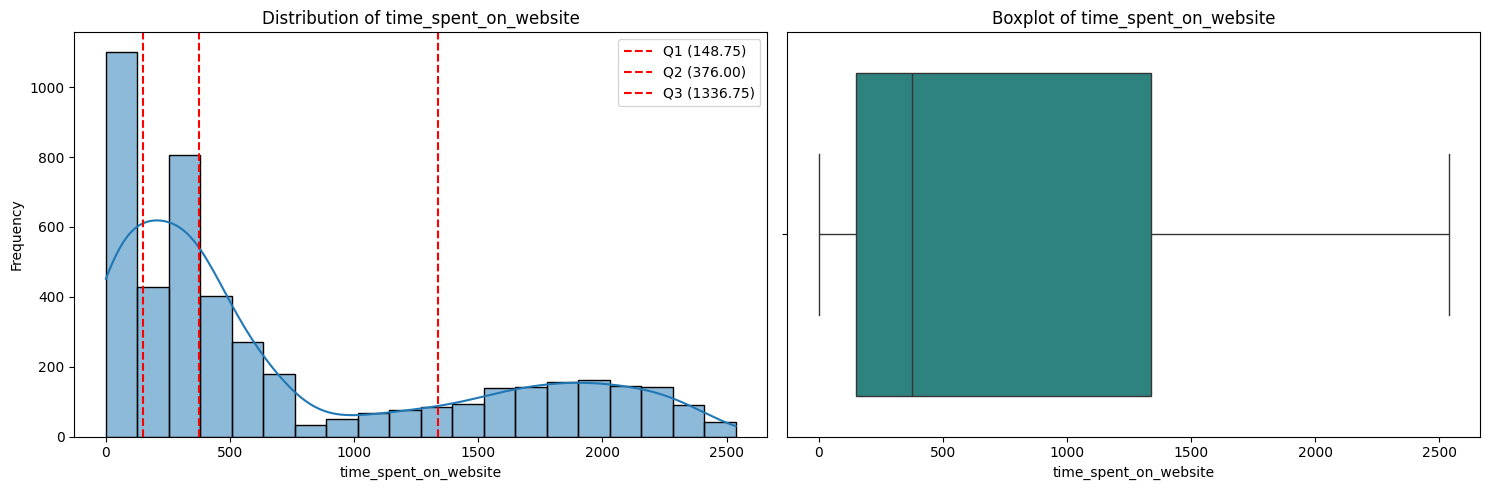

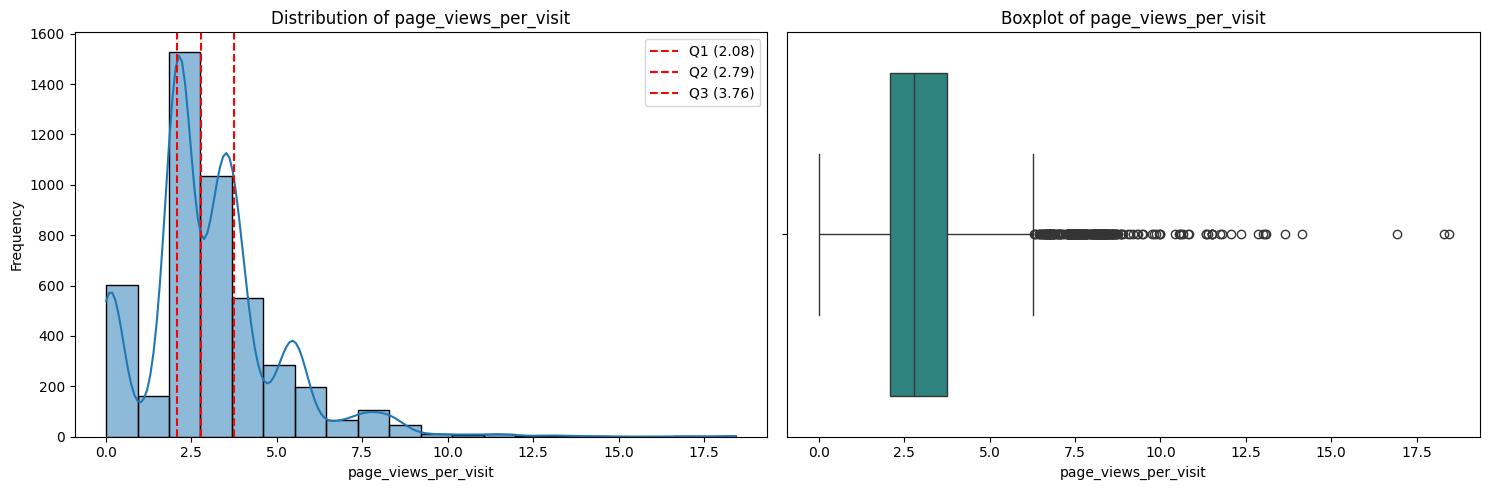

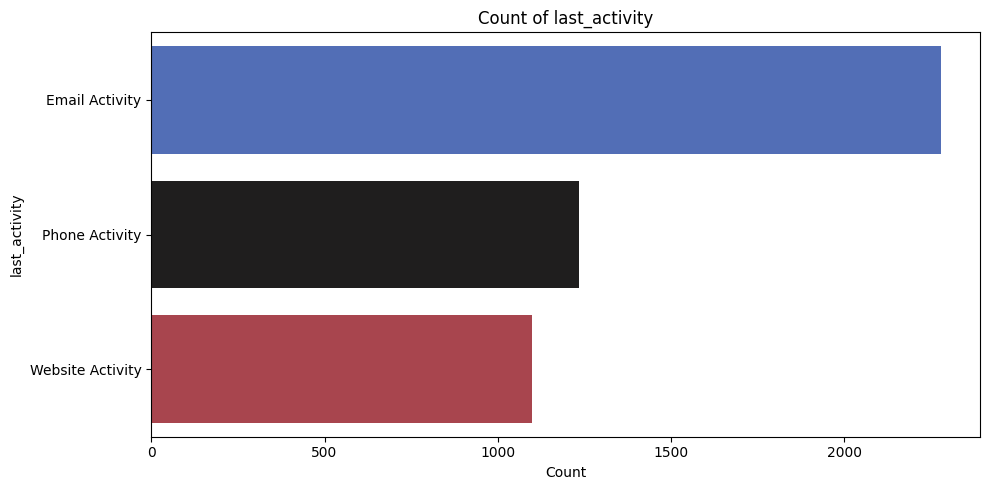

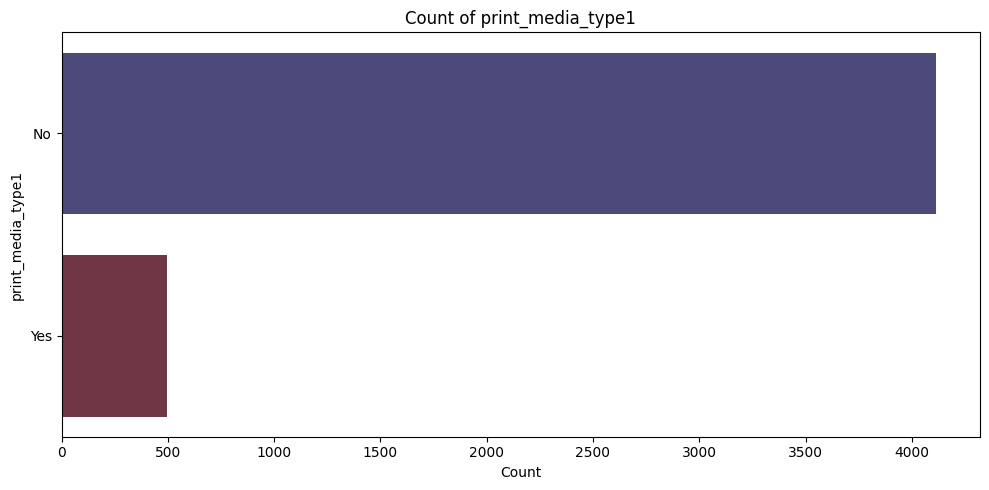

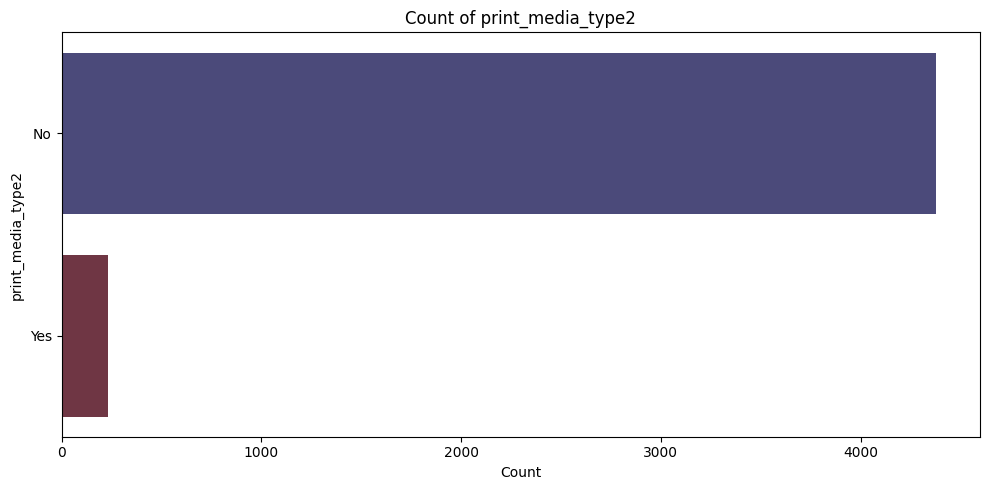

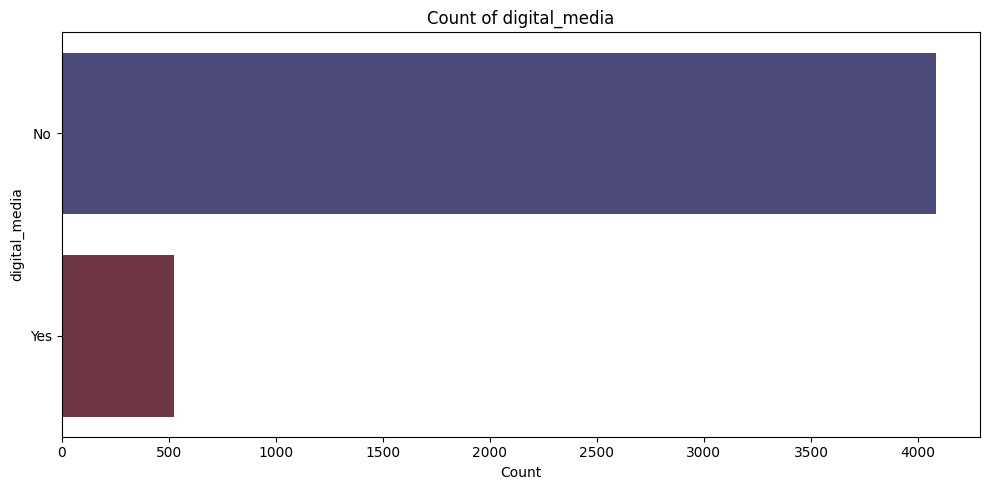

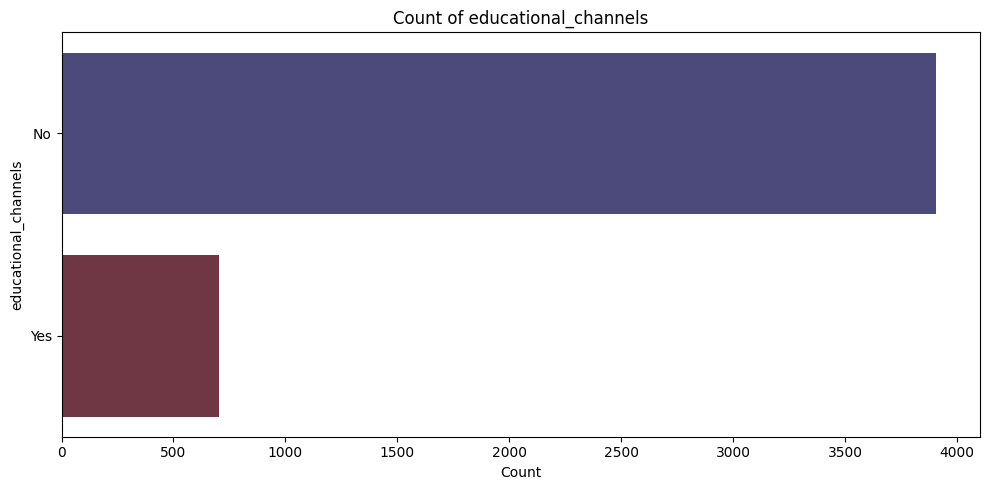

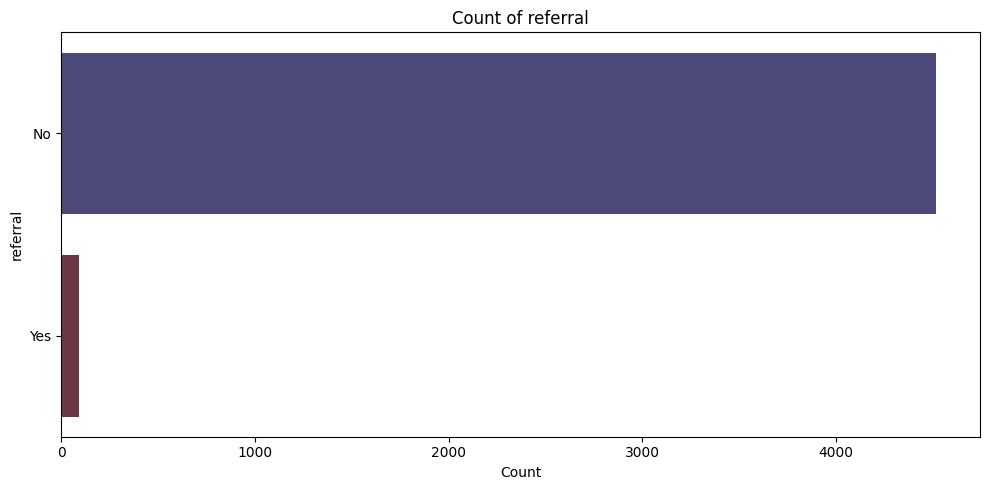

In [ ]:
# Univariate analysis function
def univariate_analysis(data, column):
    if data[column].dtype in ['int64', 'float64']:
        # For numerical data, plot histogram and boxplot side by side
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Histogram with KDE
        sns.histplot(data[column], kde=True, bins=20, ax=axes[0], palette="icefire")
        axes[0].set_title(f'Distribution of {column}')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frequency')

        # Adding quartiles to the histogram
        quartiles = data[column].quantile([0.25, 0.5, 0.75])
        for q in quartiles:
            axes[0].axvline(q, color='red', linestyle='--', label=f'Q{quartiles.tolist().index(q)+1} ({q:.2f})')
        axes[0].legend()

        # Box and whisker plot
        sns.boxplot(x=data[column], ax=axes[1], palette='viridis')
        axes[1].set_title(f'Boxplot of {column}')
        axes[1].set_xlabel(column)

        plt.tight_layout()
        plt.show()

    else:
        # For categorical data, plot a countplot
        plt.figure(figsize=(10, 5))
        sns.countplot(y=data[column], order=data[column].value_counts().index, palette="icefire")
        plt.title(f'Count of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.tight_layout()
        plt.show()

# Apply univariate analysis
# Updated loop to exclude the 'status' column from univariate analysis
for column in data.columns:
    if column != 'status':
        univariate_analysis(data, column)

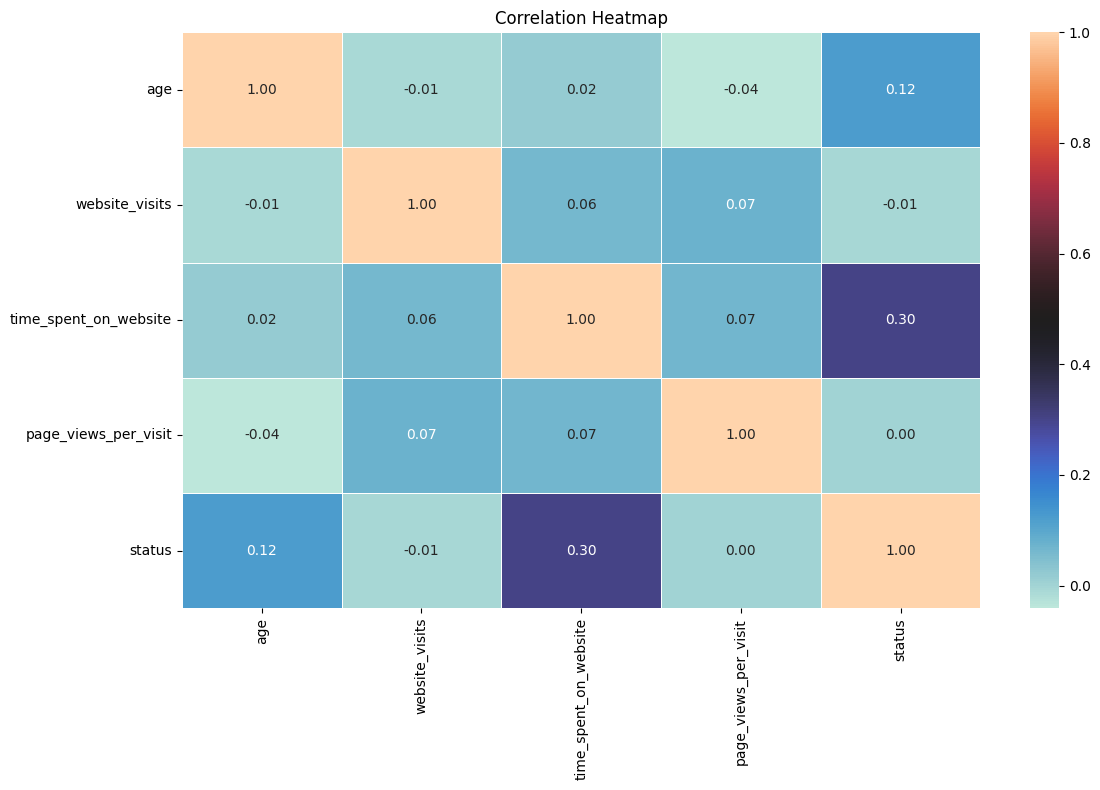

In [ ]:
# Create a heatmap using the colormap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)  # Compute correlation matrix for numerical data
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

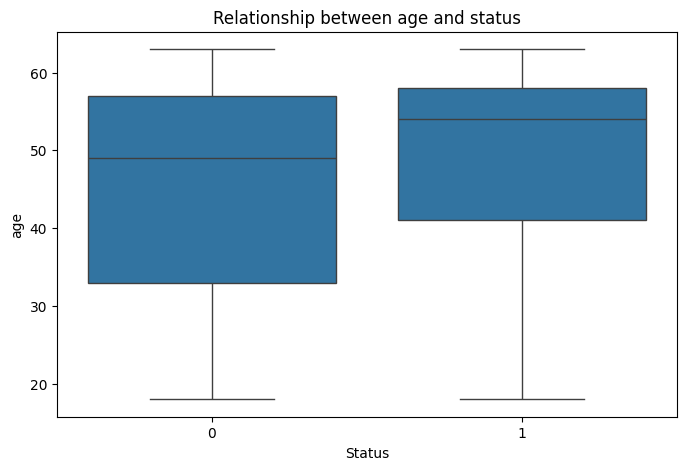

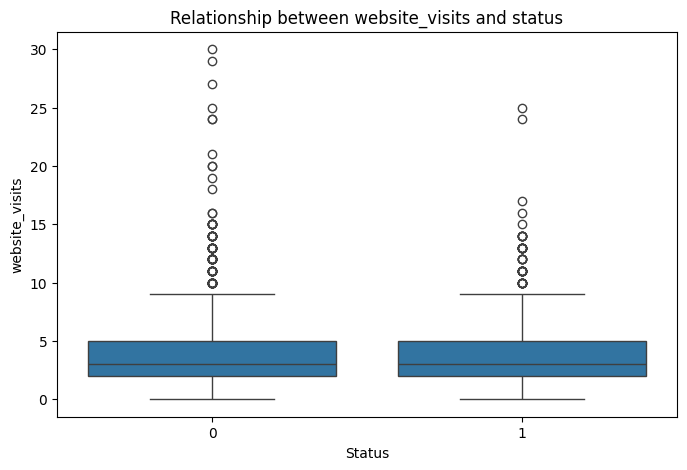

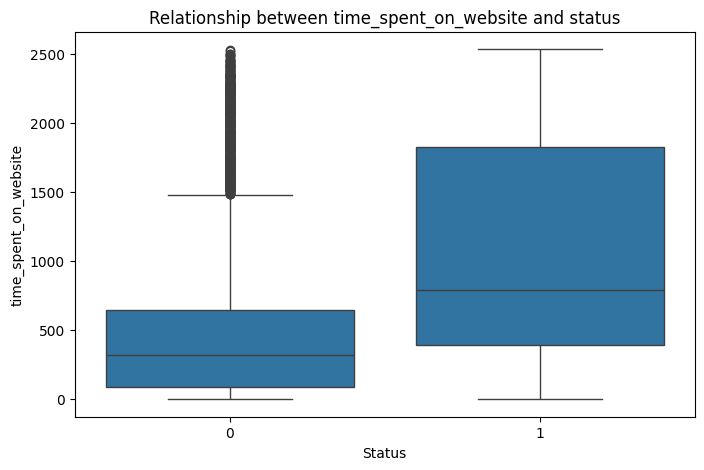

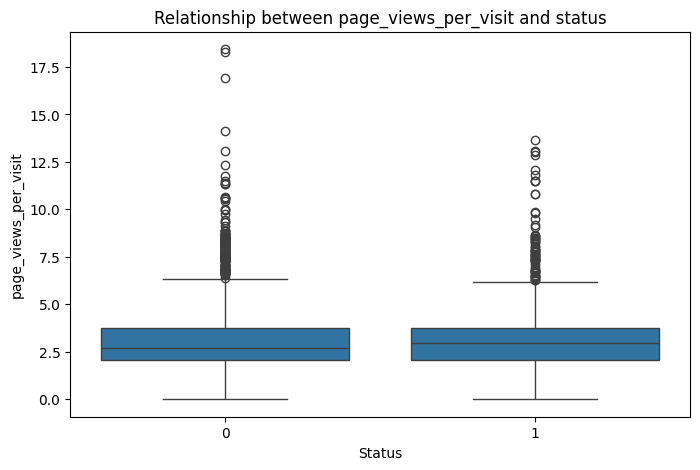

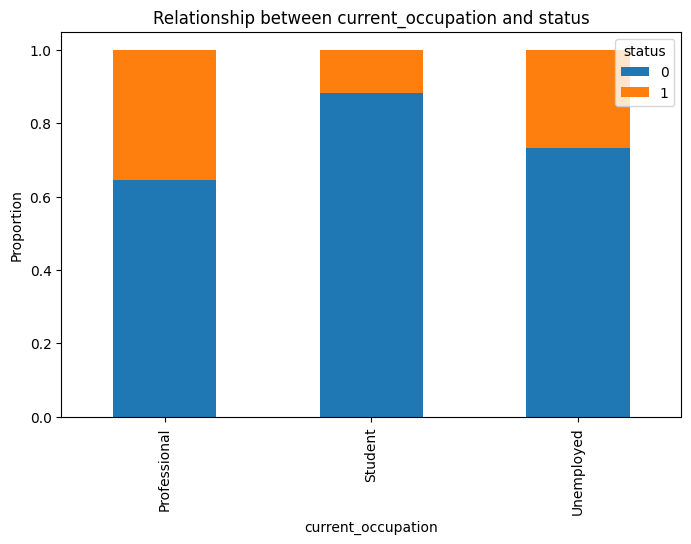

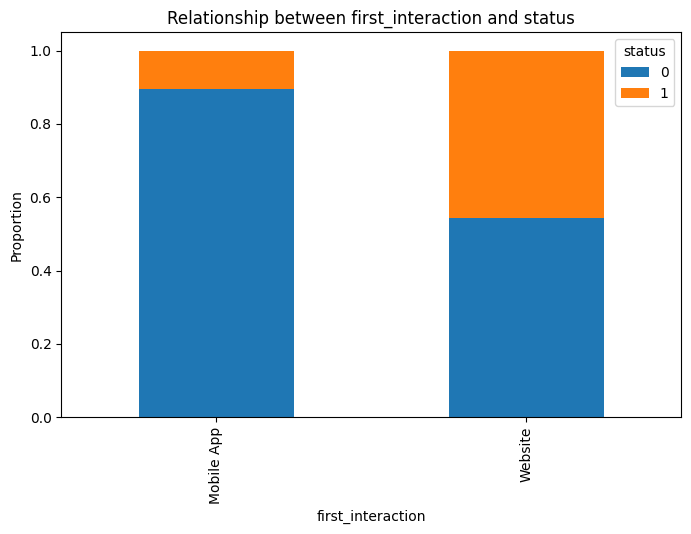

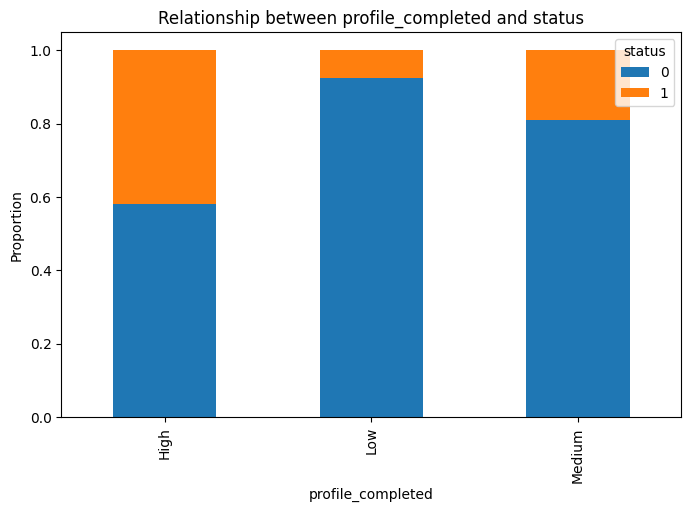

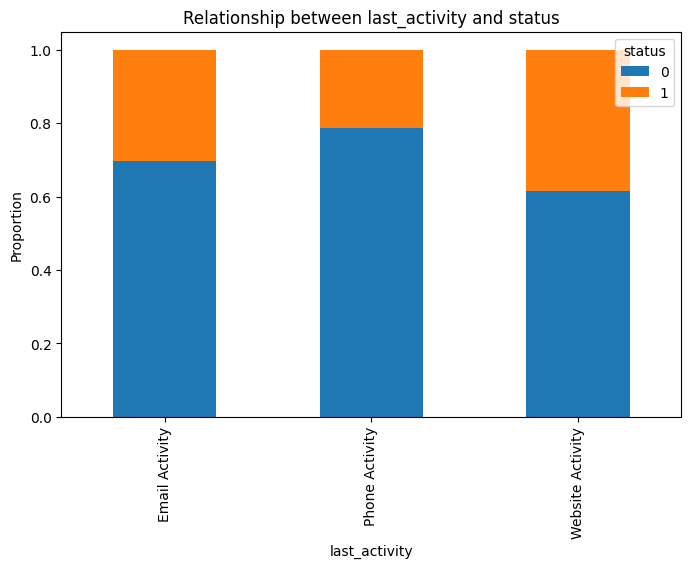

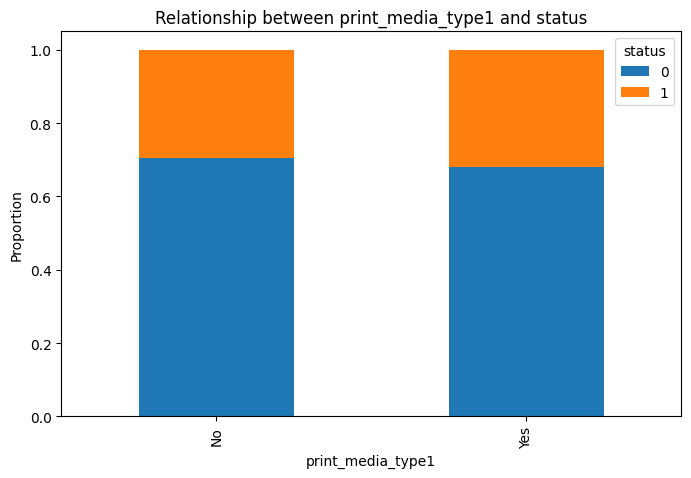

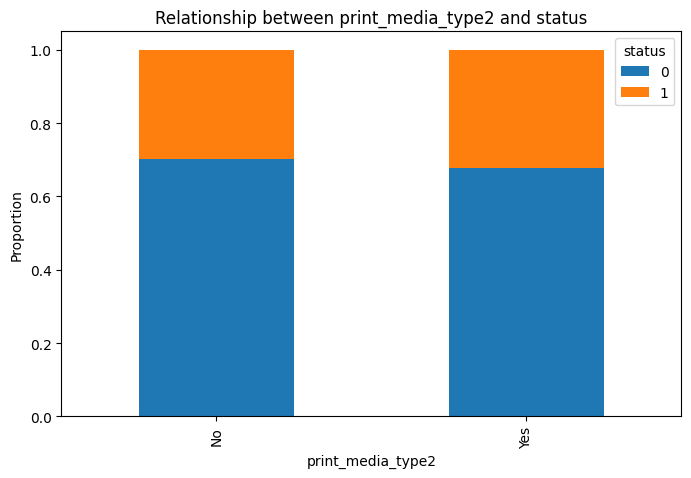

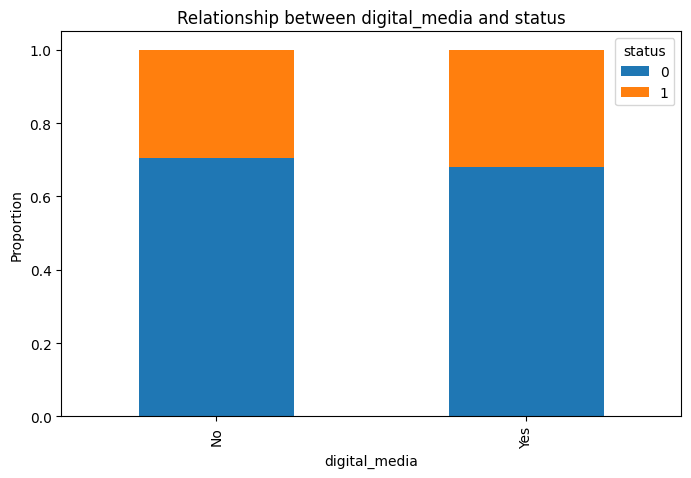

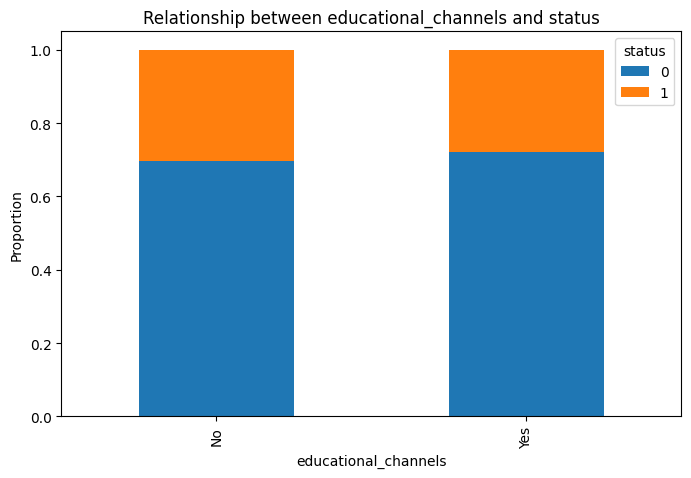

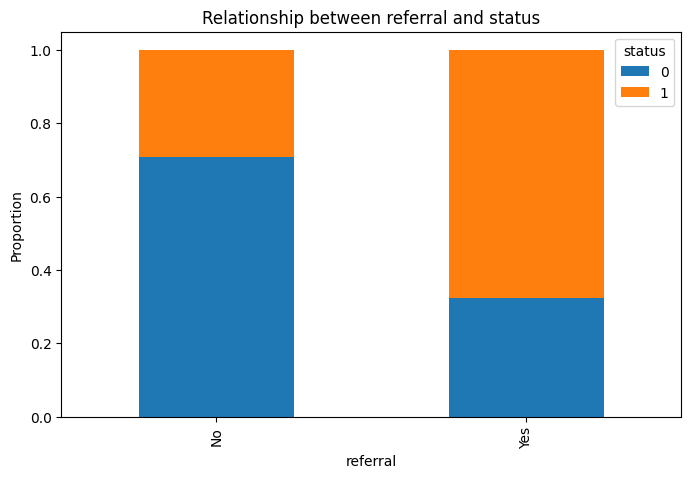

Correlation of Numerical Features with Status:
status                   1.00000
time_spent_on_website    0.30210
age                      0.12208
page_views_per_visit     0.00031
website_visits          -0.00661
Name: status, dtype: float64

Categorical Features Analysis with `status`:

current_occupation:

status                   0       1
current_occupation                
Professional       0.64488 0.35512
Student            0.88288 0.11712
Unemployed         0.73421 0.26579

first_interaction:

status                  0       1
first_interaction                
Mobile App        0.89469 0.10531
Website           0.54406 0.45594

profile_completed:

status                  0       1
profile_completed                
High              0.58216 0.41784
Low               0.92523 0.07477
Medium            0.81124 0.18876

last_activity:

status                 0       1
last_activity                   
Email Activity   0.69666 0.30334
Phone Activity   0.78687 0.21313
Website Activity 0.

In [ ]:
# Bivariate Analysis Function
#As we are predicting conversion to paid customers, I will analyze relation to status
# Splitting the data into numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Analyze numerical features against `status`
for col in numerical_columns:
    if col != 'status':  # Exclude the target variable from numerical analysis
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, x='status', y=col)
        plt.title(f'Relationship between {col} and status')
        plt.xlabel('Status')
        plt.ylabel(col)
        plt.show()

# Compute correlation between numerical features and `status`
correlation_with_status = data[numerical_columns].corr()['status'].sort_values(ascending=False)

# Analyze categorical features against `status`
categorical_status_analysis = {}
for col in categorical_columns:
    cross_tab = pd.crosstab(data[col], data['status'], normalize='index')
    categorical_status_analysis[col] = cross_tab
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Relationship between {col} and status')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.show()
    # Display the correlation of numerical features with `status`
print("Correlation of Numerical Features with Status:")
print(correlation_with_status)

# Display and save categorical analysis results
print("\nCategorical Features Analysis with `status`:")
for col, cross_tab in categorical_status_analysis.items():
    print(f"\n{col}:\n")
    print(cross_tab)


## **Exploratory Data Analysis (EDA)**
### Target Distribution
- The target variable status is imbalanced, with 30% (1,377 out of 4,612) of leads converting to paid customers.

### Key Findings
#### Impact of Variables
1. **Current Occupation**:
   - **Professionals** are more likely to convert compared to students or unemployed leads.
2. **First Interaction**:
   - Leads interacting via the **Website** had higher conversion rates compared to the mobile app.
3. **Profile Completion**:
   - Higher profile completion percentage (**Medium: 50-75%**) or (**High: 75-100%**) significantly increases conversion likelihood.
4. **Last Activity**:
   - **Website activities** show better lead conversion rates than email or phone interactions.
5. **Lead Source**:
   - **Digital media** and **referrals** have higher conversion rates than print media.

#### Correlation Analysis
- The **heatmap** revealed moderate correlations between:
  - `time_spent_on_website` has the strongest positive correlation with `status` (conversion).
  - `age` has the second strongest positive correlation with `status`.
  - Weak negative correlation observed for `website_visits`.

####Outlier Analysis
- Time Spent on Website:
Outliers detected at the higher end (>2,500 seconds).
 - Action: Retained outliers as they may represent highly engaged leads likely to convert.
- Website Visits:
Outliers observed for leads with exceptionally high visits (>20).
 - Action: Retained to avoid losing potential insights.

In [ ]:
#Data Split for modeling
X = data.drop('status', axis=1)
Y = data['status']
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
2462,57,2,26,0.10900,False,True,False,False,False,False,False,False,False,False,False,False
1621,57,7,385,8.20100,False,False,True,False,True,True,False,False,False,True,True,False
197,32,9,2001,2.17800,False,True,True,False,True,False,False,False,False,False,False,False
2181,34,3,318,3.92600,False,False,False,False,True,False,False,True,False,False,False,False
2867,37,4,211,2.01000,False,True,False,True,False,False,False,True,False,False,False,False


In [ ]:
X_train.shape

(3228, 16)

In [ ]:
X_test.shape

(1384, 16)

In [ ]:
y_train.value_counts(normalize=True)

,proportion
status,
0,0.70415
1,0.29585


In [ ]:
y_test.value_counts(normalize=True)

,proportion
status,
0,0.69509
1,0.30491


In [ ]:
# Define a function named 'metrics_score' to evaluate the performance of a classification model
def metrics_score(actual, predicted):
    # Print the classification report showing precision, recall, f1-score, and support for each class
    print(classification_report(actual, predicted))

    # Compute the confusion matrix to visualize the performance of the classification model
    cm = confusion_matrix(actual, predicted)

    # Set the size of the figure for the confusion matrix heatmap
    plt.figure(figsize=(8,5))

    # Create a heatmap to display the confusion matrix with annotations
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    # Label the y-axis as 'Actual' to indicate the true labels
    plt.ylabel('Actual')

    # Label the x-axis as 'Predicted' to indicate the model's predictions
    plt.xlabel('Predicted')

    # Display the plot with the confusion matrix heatmap
    plt.show()

## Building a Decision Tree model

In [ ]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=1)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



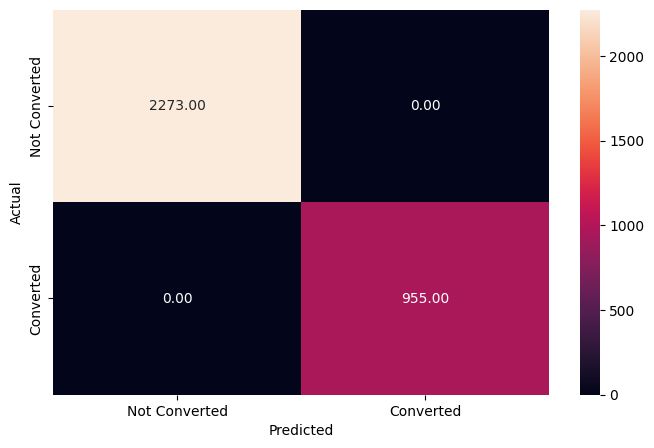

In [ ]:
# Predict on the train data
y_pred_train = dt_model.predict(X_train)

# Evaluate the model
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



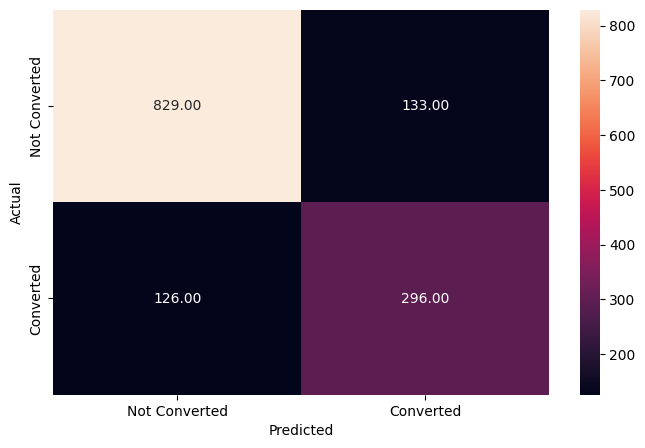

In [ ]:
# Predict on the train data
y_pred_test = dt_model.predict(X_test)

# Evaluate the model
metrics_score(y_test, y_pred_test)

**Observations:**
- Poor preformance on the test data indicates overfitting of the model.

| Dataset          | Accuracy | F1-Score | Recall (Class 1) | Precision (Class 1) |
|------------------|----------|----------|-------------------|---------------------|
| Training (Initial) | 100%    | 1.00     | 100%             | 100%               |
| Test (Initial)     | 81%     | 0.70     | 70%              | 69%                |

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



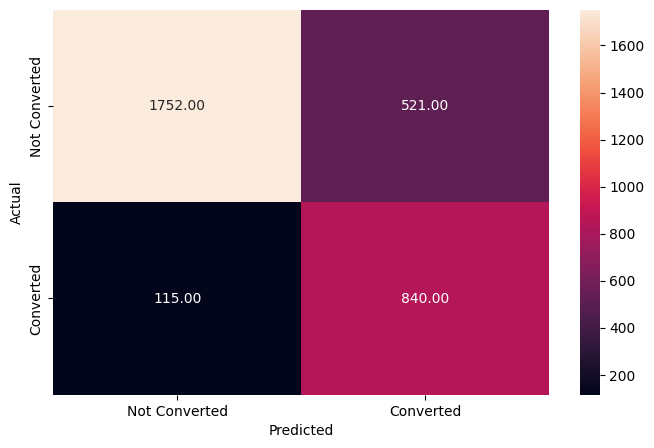

In [ ]:
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

**Observations:**
- It is not a perfect fit, which is more desired than overfitting.

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



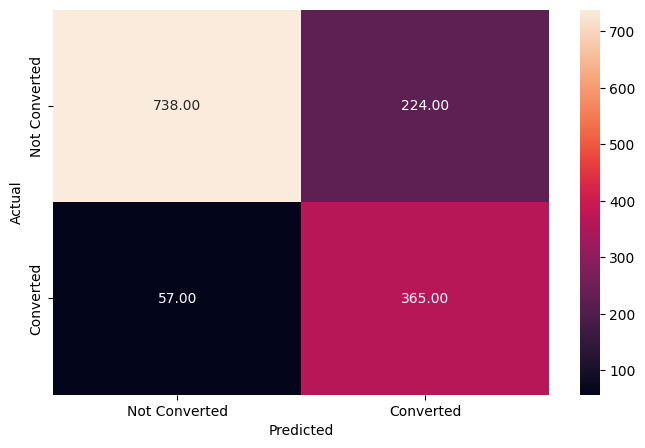

In [ ]:
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

**Observations:**
- Similar preformance on the test data indicates proper fitting of the model.

| Dataset          | Accuracy | F1-Score | Recall (Class 1) | Precision (Class 1) |
|------------------|----------|----------|-------------------|---------------------|
| Training (Tuned)   | 80%     | 0.73     | 88%              | 62%                |
| Test (Tuned)       | 80%     | 0.72     | 86%              | 62%                |

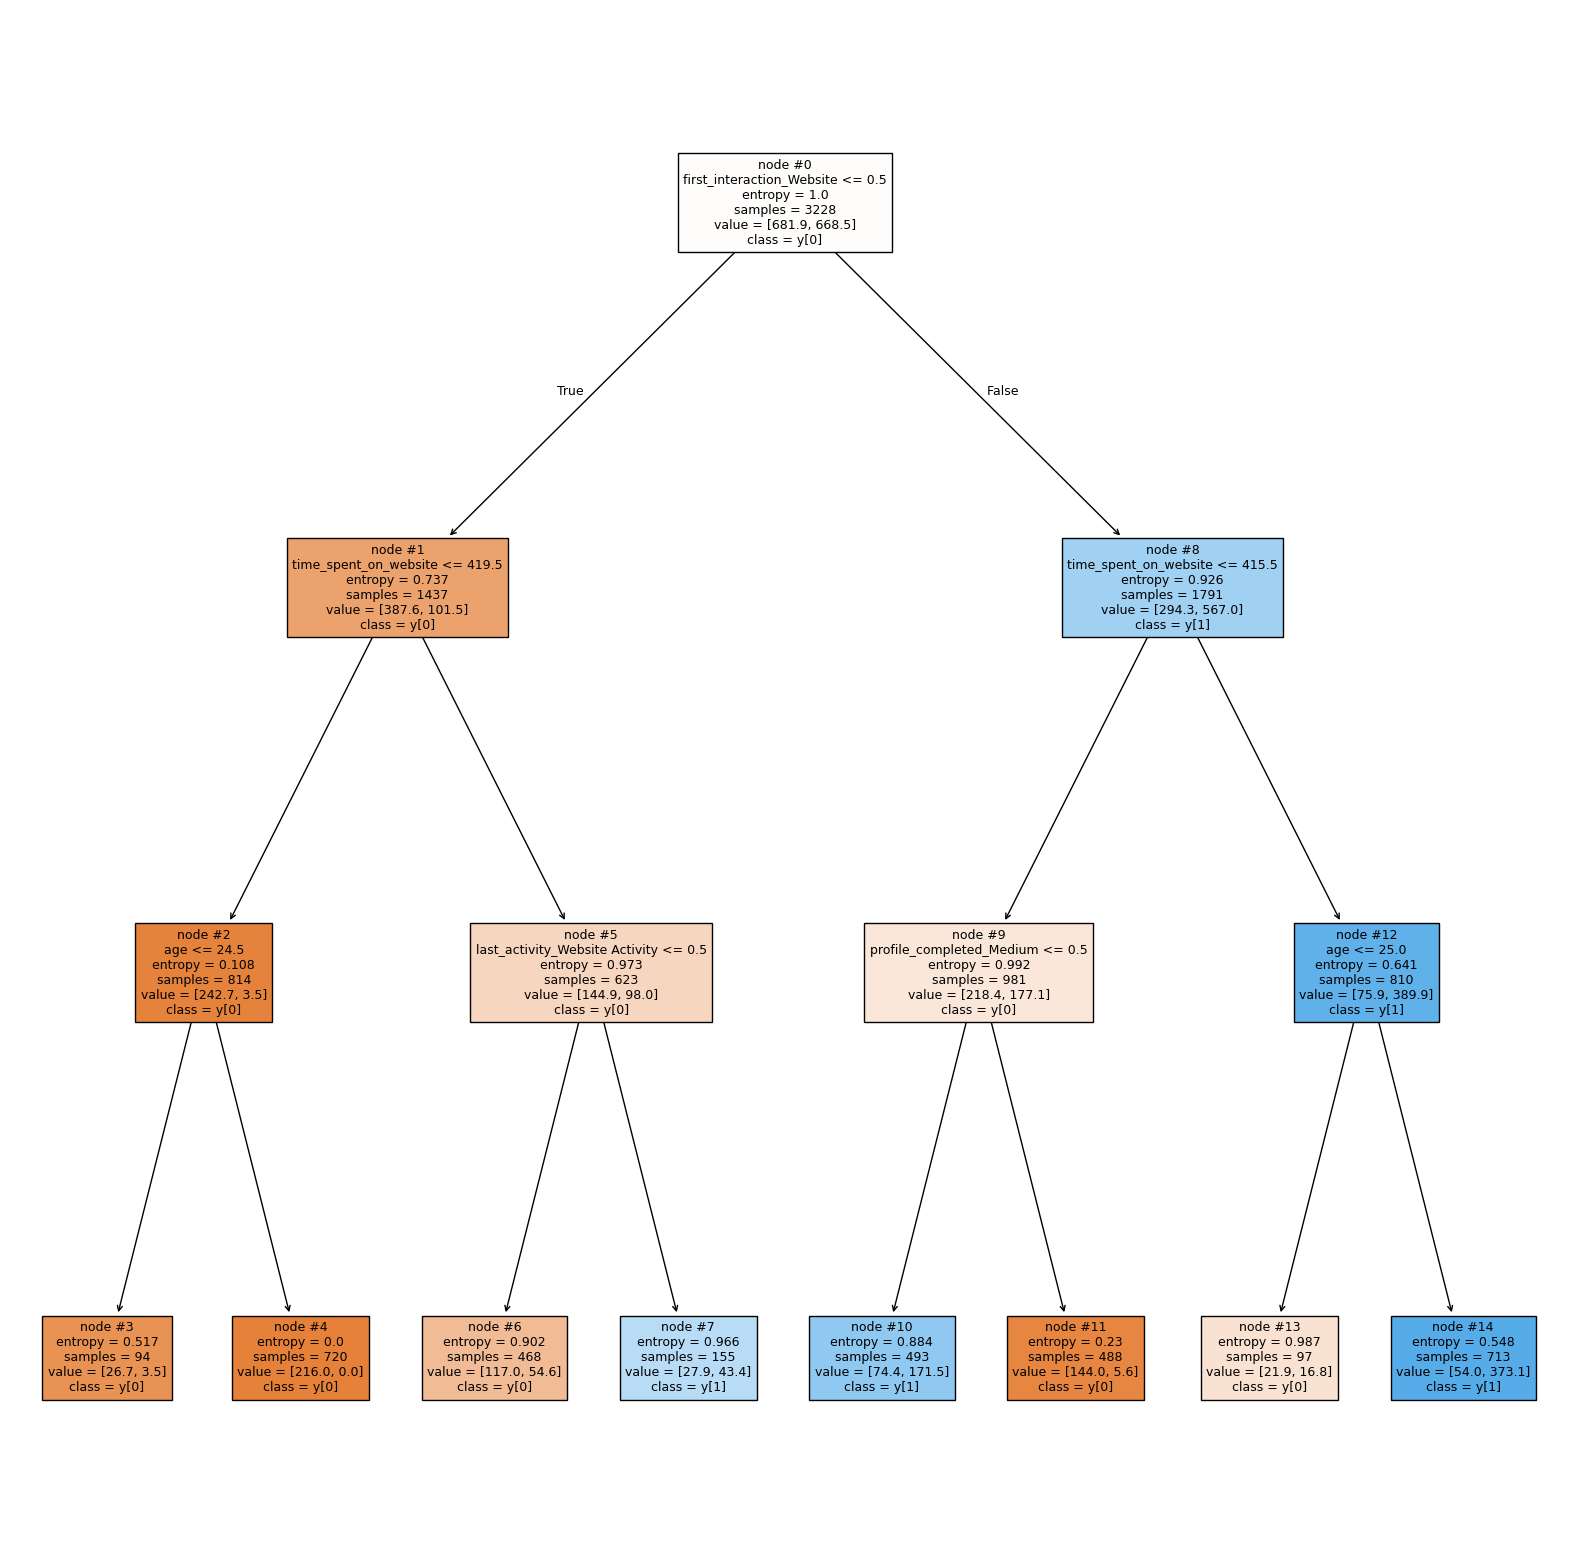

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


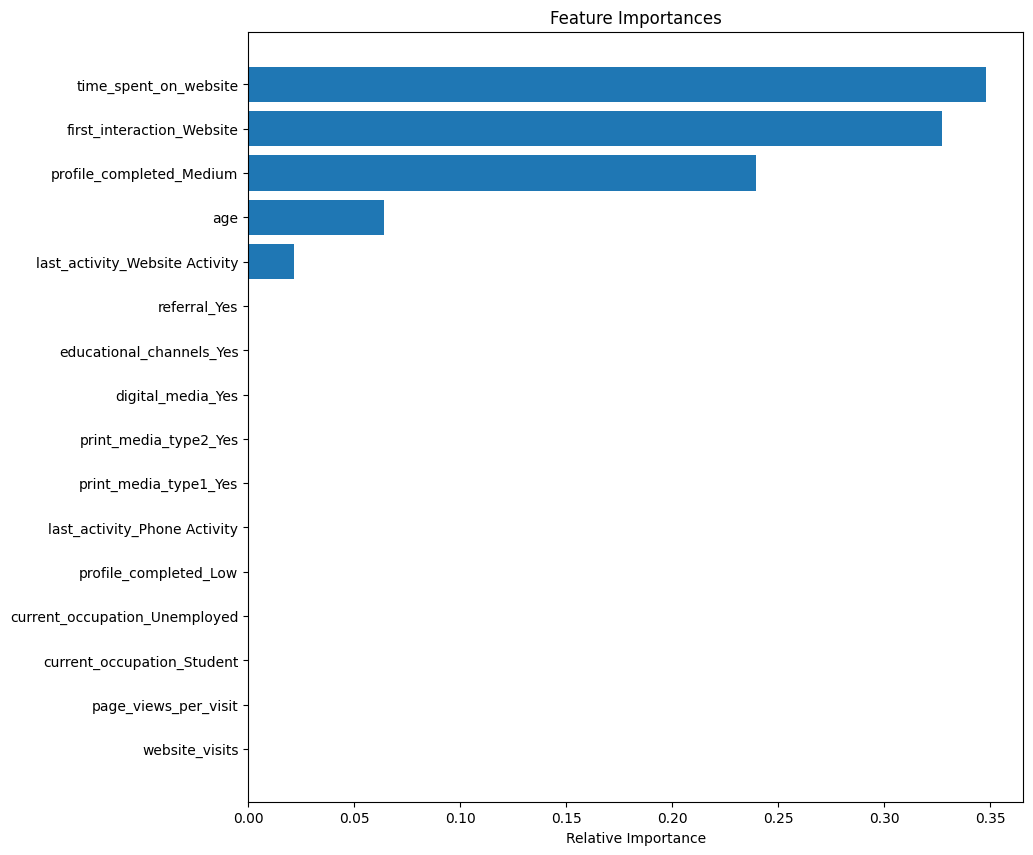

In [ ]:
# Visualize Feature Importance in Decision Tree Model

# Extract Feature Names for Labels
feature_names = list(X_train.columns)

# Extract Feature Importance Values from the Model
importances = d_tree_tuned.feature_importances_

# Sort Indices by Importance
indices = np.argsort(importances)

# Create a Figure for the Plot
plt.figure(figsize=(10, 10))

# Set Plot Title
plt.title("Feature Importances")

# Create Horizontal Bar Chart of Feature Importances
plt.barh(range(len(indices)), importances[indices], align="center")

# Set Y-Axis Labels (Feature Names)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

# Set X-Axis Label
plt.xlabel("Relative Importance")

# Show the Plot
plt.show()

## Building a Random Forest model

In [ ]:
rf_model = RandomForestClassifier(criterion = "entropy", random_state = 7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



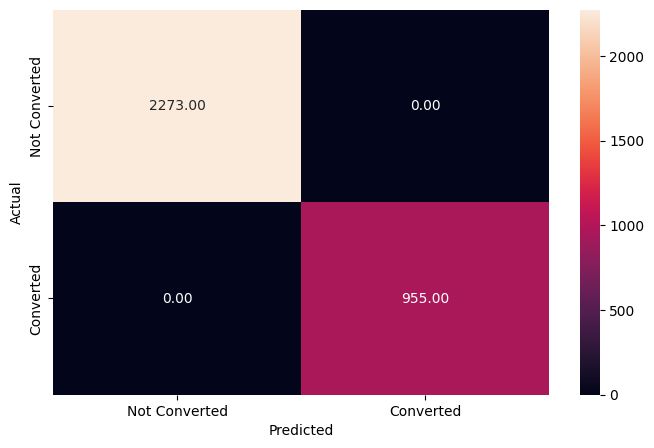

In [ ]:
y_pred_train_rf = rf_model.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



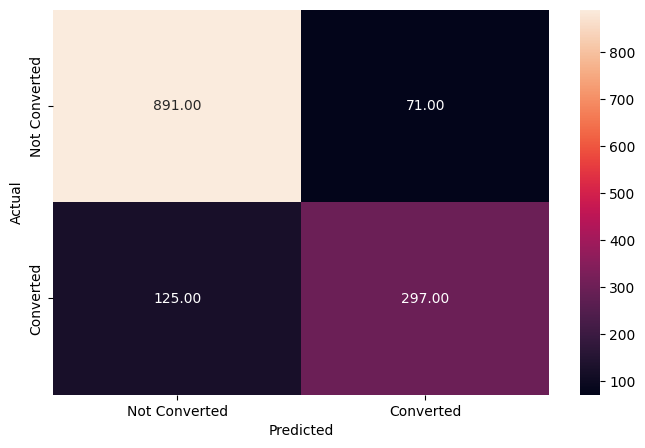

In [ ]:
y_pred_test_rf = rf_model.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

**Observations:**
- Poor preformance on the test data indicates overfitting of the model.

| Dataset          | Accuracy | F1-Score | Recall (Class 1) | Precision (Class 1) |
|------------------|----------|----------|-------------------|---------------------|
| Training (Initial) | 100%    | 100%     | 100%             | 100%               |
| Test (Initial)     | 86%     | 75%     | 70%              | 81%                |

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



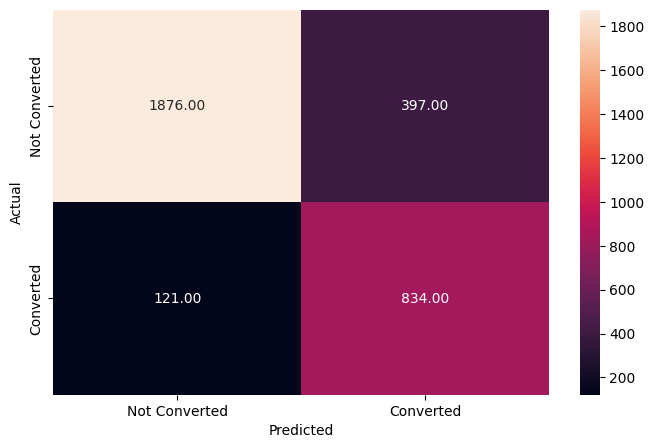

In [ ]:
y_pred_train_rf2 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf2)

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



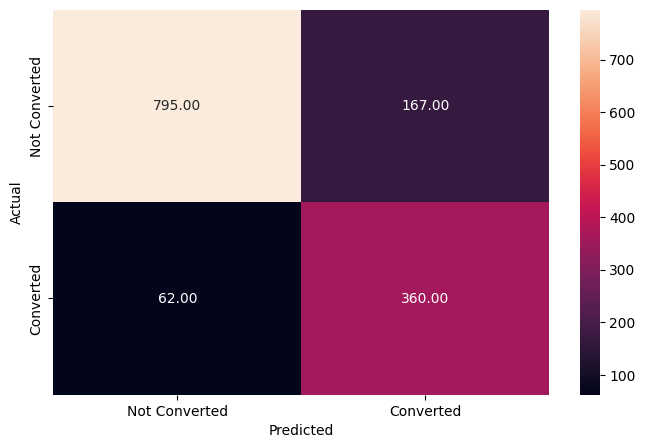

In [ ]:
y_pred_test_rf2 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf2)

**Observations:**
- Similar preformance on the test data indicates proper fitting of the model.

| Dataset          | Accuracy | F1-Score | Recall (Class 1) | Precision (Class 1) |
|------------------|----------|----------|-------------------|---------------------|
| Training (Tuned)   | 84%     | 76%     | 87%              | 68%                |
| Test (Tuned)       | 83%     | 76%     | 85%              | 68%                |

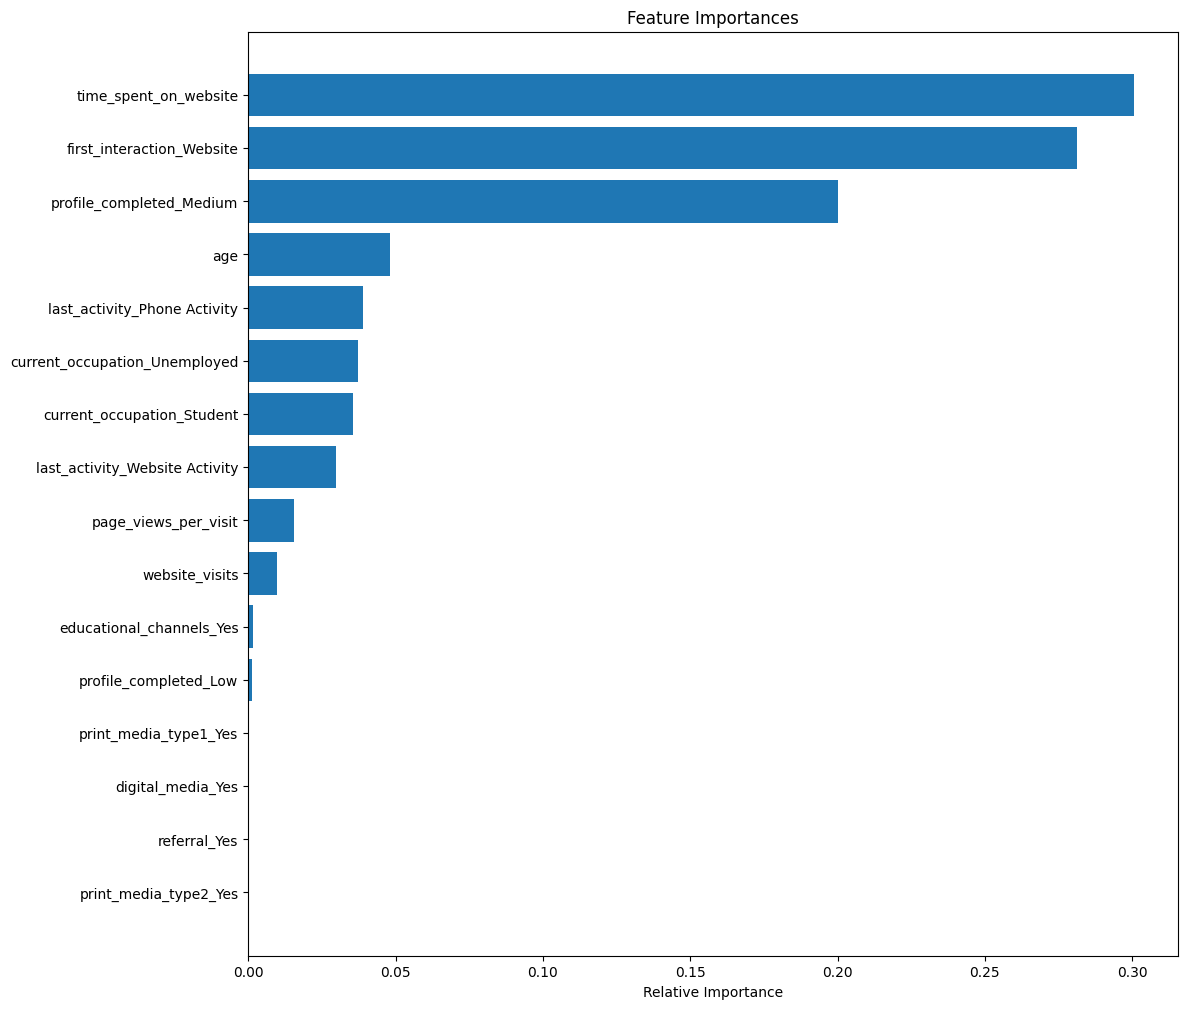

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## **Model Evaluation**
### **Decision Tree Model**
- **Initial Model**:
  - **Training Data**: Perfect fit (F1-score = 1.00).
  - **Test Data**: Moderate overfitting (F1-score = 0.70).
- **Tuned Decision Tree**:
  - Improved **generalization** after pruning:
    - **Training F1-score**: 0.73.
    - **Test F1-score**: 0.72.
  - Recall improved to **86%**, emphasizing reduced false negatives.

### **Random Forest Model**
- **Initial Model**:
  - Overfit on training data (F1-score = 1.00).
  - Underperformed on test data with **recall = 70%**.
- **Hyper-Tuned Model**:
  - Achieved the best performance:
    - **Test F1-score**: 0.76.
    - **Recall**: 85%, balancing precision (68%).
  - Better generalization and higher macro-average scores (**84%**).

### **Performance Comparison**
| Model                   | Accuracy | F1-Score | Recall | Precision |
|--------------------------|----------|----------|--------|-----------|
| Decision Tree (Tuned)    | 80%      | 72%      | 86%    | 62%       |
| Random Forest (Tuned)    | 83%      | 76%      | 85%    | 68%       |

## **Feature Importance**
### **Top Features Across Models**:
1. **`time_spent_on_website`**:
   - The most significant predictor of conversion in both Decision Tree and Random Forest models.
2. **`first_interaction_Website`**:
   - Visitors whose first interaction was through the **website** were more likely to convert.
3. **`profile_completed`**:
   - Leads with **high or medium profile completion** had significantly higher conversion rates.
4. **`age`**:
   - Conversion likelihood increased for visitors aged **45-55 years**.

## Actionable Insights and Recommendations

## **Actionable Insights and Recommendations**

### **Actionable Insights**
1. **Time Spent on Website is Critical**:
   - Visitors who spend more time on the website are significantly more likely to convert into paying customers. This was the most important feature across all models.

2. **Website as the First Interaction Channel**:
   - Leads whose first interaction with ExtraaLearn is via the **website** show a higher conversion rate compared to those using the mobile app. This indicates the need to strengthen the website's onboarding experience.

3. **Profile Completion Drives Conversions**:
   - Leads with a **medium (50–75%) or high (75–100%) profile completion** have a higher likelihood of conversion. This suggests that encouraging visitors to complete their profiles could positively impact conversions.

4. **Age Matters**:
   - Visitors aged **45-55 years** are more likely to convert. Tailoring marketing campaigns and content to target this age group could enhance conversion rates.

5. **Digital Media and Referrals are Effective**:
   - Leads sourced from **digital media platforms** and **referrals** show higher conversion rates compared to traditional print media. These channels should be prioritized for lead generation campaigns.

6. **Email as a Last Activity**:
   - Email-based interactions are more effective in driving conversions compared to website or phone-based interactions. This highlights the importance of nurturing leads through email communication.

---

### **Recommendations**
1. **Optimize Website Experience**:
   - Focus on making the website more engaging and user-friendly to encourage longer visits and interactions.
   - Provide clear calls-to-action and easily accessible information to guide visitors through the decision-making process.

2. **Encourage Profile Completion**:
   - Use incentives or gamification to encourage visitors to complete their profiles. Examples include progress bars, badges, or personalized recommendations unlocked upon profile completion.

3. **Target Marketing Efforts**:
   - Focus marketing campaigns on the **45-55 age group**, highlighting the benefits and outcomes of ExtraaLearn's programs for professionals and older learners.

4. **Enhance Email Nurturing**:
   - Implement automated and personalized email campaigns to re-engage leads who interacted with ExtraaLearn but have not yet converted.
   - Use content such as success stories, program highlights, and special offers to maintain interest.

5. **Invest in Digital Media and Referrals**:
   - Increase advertising efforts on digital platforms like social media and online forums, as these channels yield higher conversion rates.
   - Build a **referral program** to incentivize current customers to recommend ExtraaLearn to others.

6. **Improve the Mobile App Experience**:
   - Address the lower conversion rates from mobile app interactions by improving the app's interface, adding features to encourage longer engagement, and creating a seamless profile completion process.

7. **Implement Lead Scoring**:
   - Use the hyper-tuned Random Forest model to score and prioritize leads based on their likelihood of conversion. This will help allocate resources more effectively to high-potential leads.

8. **Conduct A/B Testing**:
   - Test different strategies for improving lead conversion, such as personalized email content versus standardized campaigns, or website-driven versus app-driven engagements.

9. **Continuous Monitoring and Model Updates**:
   - Regularly retrain the model with new data to adapt to changing customer behavior and market trends.

By implementing these recommendations, ExtraaLearn can better target potential customers, improve resource allocation, and ultimately increase its conversion rate.